In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[21]:


import pandas as pd
from tqdm import tqdm
import gensim
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#os.chdir(r"D://Proposal_Defense//Simulations")
#from Utils.Script_utils import get_data_splits, first_LSTM_training, get_data_splits_mod1, get_data_splits_old_algo, get_data_splits_old_algo_doc_word
from joblib import Parallel, delayed
from scipy.stats import norm
import sys
import multiprocessing
print(multiprocessing.cpu_count(), flush = True)
use_cores  = multiprocessing.cpu_count() - 1


# In[22]:


# Seed value
# Apparently you may use different seed values at each stage
seed_value= 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# # 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
# tf.config.set_visible_devices([], 'GPU')

from tqdm.notebook import tqdm
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)


# In[23]:


import matplotlib.pyplot as plt

import pickle


# In[24]:


model_cbow = gensim.models.word2vec.Word2Vec.load(r"word2vec_sg")


# In[25]:


lr = 1e-3
# from sklearn.model_selection import train_test_split


## Read the data
data = pd.read_csv(r"word2vec_sg.csv")


# In[27]:


data_dbow = pd.read_csv(r"doc2vec_dbow.csv")


# In[1]:


# np.mean(data_dbow["sig_gene_seq"].values == data["sig_gene_seq"].values)


# In[28]:


data = pd.concat([ data, data_dbow.iloc[:,-50:]], 1)


# In[29]:


data_columns = [['sig_gene_seq'], ['high_level_substr'], list(range(0,100))]


# In[30]:


data_columns = [inner for item in data_columns for inner in item]


# In[31]:


data_columns = [str(col) for col in data_columns]


# In[32]:


data.columns = data_columns


# In[33]:


## We only using xylan and pectin
to_keep = ["pectin", "xylan"]

data = data[data["high_level_substr"].isin(to_keep)]

data = data.reset_index(drop = True)

features = [seq.replace("|", ",").replace(",", " ") for seq in data["sig_gene_seq"].values]

features  = np.array(features)

features = features.reshape(-1,1)


# In[2]:


# data["high_level_substr"].value_counts()


# In[34]:


data.head()


# In[35]:


reps = 50


48
No GPU found


/tmp/ipykernel_1874345/3034037371.py:103: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([ data, data_dbow.iloc[:,-50:]], 1)


In [2]:
print("done step 1", flush = True)

# In[37]:


with open('first_lstm_word2vec_doc2vec_var_0.0001.pkl', 'rb') as f:
    first_lstm = pickle.load(f)  


print("done step 2", flush = True)



with open('first_lstm_word2vec_doc2vec_var_0.0001.pkl', 'rb') as f:
    first_lstm = pickle.load(f)  

    
with open('true_data_word2vec_doc2vec_var_0.0001_train_probs.pkl', 'rb') as f:
    catch_train_probs = pickle.load(f)    

with open('true_data_word2vec_doc2vec_var_0.0001_valid_probs.pkl', 'rb') as f:
    catch_valid_probs = pickle.load( f)      
    
with open('true_data_word2vec_doc2vec_var_0.0001_test_probs.pkl', 'rb') as f:
    catch_test_probs = pickle.load( f)     

done step 1
done step 2


In [3]:
print("entered")
# var_targets = float(sys.argv[1])
var_targets = 0.0001
print("exited")


entered
exited


In [4]:
with open('second_lstm_with_word2vec_doc2vec_var_0.0001.pkl', 'rb') as f:
    second_lstm = pickle.load(f)  

print("done step 3", flush = True)

done step 3


In [5]:
# for i in range(0, reps):
#     print(np.mean(catch_train_labels_second[i] == catch[i][3].reshape(-1,1)))

In [6]:
# for i in range(0, reps):
#     print(np.mean(catch[i][0] == catch_train_seqs[i]))

In [7]:
def ann(hidden = 10): 
    input_layer = tf.keras.layers.Input(shape = (X_train_word2vec.shape[1]))
    hidden_layer = tf.keras.layers.Dense(hidden)
    hidden_output = hidden_layer(input_layer)
    pred_layer = tf.keras.layers.Dense(1)
    pred_output = pred_layer(hidden_output)
#     pred_output = tf.keras.layers.Activation("softmax")(pred_output)
    model = tf.keras.models.Model(input_layer, pred_output)
    return model


# In[44]:


h1, h2 = 16,16


# In[45]:


X_train_word2vec = data.iloc[:,-50:]


# In[46]:


ann_15 = ann(h1)


# In[14]:


# ann_15.summary()


# In[48]:


ann_20 = ann(h2)


# In[15]:


# ann_20.summary()


# In[16]:


# for i in range(0, reps):
#     print(np.abs(tf.math.sigmoid(catch_train_logits[i]).numpy() - tf.math.sigmoid(second_lstm[i][0])).mean())


# In[51]:


total_weights_1 = ann_15.count_params()


# In[52]:


total_weights_2 = ann_20.count_params()


# In[53]:


total_weights = total_weights_1 + total_weights_2 + 1 


# In[17]:


# total_weights


# In[55]:


## batch size
batch_size = 32

In [8]:
from scipy.stats import multivariate_normal as mvn


# In[57]:


from scipy.stats import invgamma, norm


# In[58]:


from tqdm.notebook import tqdm


# In[59]:


threshold = 15


# In[60]:


import random


# In[61]:


lr = 0.1


# In[62]:


import numpy as np


# In[63]:


weights_ann_1 = ann_15.get_weights()
weights_ann_2 = ann_20.get_weights()


In [9]:
def get_targets_with_weights(batch_data, batch_data1, initial_ensembles, log_sigma_points_1): 

    n_hidden_1 = len(weights_ann_1[0].ravel())

    hidden_weights_1 = initial_ensembles[:,:n_hidden_1].reshape( size_ens, batch_data.shape[1], h1)

    
    hidden_output_1 = np.einsum('ij,kjl->kil', batch_data, hidden_weights_1)

    
    hidden_layer_bias_1 = initial_ensembles[:,n_hidden_1:(n_hidden_1 + h1)].reshape(size_ens, 1,  h1)



    hidden_output_1 = hidden_output_1 + hidden_layer_bias_1

    n_pred_weights_1 = len(weights_ann_1[2].ravel())

    output_weights_1 = initial_ensembles[:,(n_hidden_1 + h1):(n_hidden_1 + h1 + n_pred_weights_1) ].reshape(size_ens, h1, 1)

    output_1 = np.einsum('ijk,ikl->ijl', hidden_output_1, output_weights_1)


    output_layer_bias_1 = initial_ensembles[:,(n_hidden_1 + h1 + n_pred_weights_1):(n_hidden_1 + h1 + n_pred_weights_1 + 1)].reshape(size_ens, 1, 1)



    final_output_1 = output_1 + output_layer_bias_1

    n_hidden_2 = len(weights_ann_2[0].ravel())

    initial_ensembles_1 = initial_ensembles.copy()[:, total_weights_1:(total_weights_1+ total_weights_2)]

    hidden_weights_2 = initial_ensembles_1[:,:n_hidden_2].reshape(size_ens, batch_data.shape[1], h2)



    hidden_output_2 = np.einsum('ij,kjl->kil', batch_data1, hidden_weights_2)

    hidden_layer_bias_2 = initial_ensembles[:,n_hidden_2:(n_hidden_2 + h2)].reshape(size_ens, 1,  h2)

    hidden_output_2 = hidden_output_2+ hidden_layer_bias_2

    n_pred_weights_2 = len(weights_ann_2[2].ravel())

    output_weights_2 = initial_ensembles_1[:,(n_hidden_2 + h2):(n_hidden_2 + h2 + n_pred_weights_2) ].reshape(size_ens, h2, 1)


    output_2 = np.einsum('ijk,ikl->ijl', hidden_output_2, output_weights_2)


    output_layer_bias_2 = initial_ensembles_1[:,(n_hidden_2 + h2 + n_pred_weights_2):(n_hidden_2 + h2 + n_pred_weights_2 + 1)].reshape(size_ens, 1, 1)


    final_output_2 = output_2 + output_layer_bias_2


    weights_1 = initial_ensembles[:, :total_weights_1]

    weights_2 = initial_ensembles[:, total_weights_1:(total_weights_1 + total_weights_2)]


    avg_weights = initial_ensembles[:, -1].reshape(-1,1)

    avg_weights_sig = expit(avg_weights)
    
    avg_weights_sig = avg_weights_sig.reshape(avg_weights_sig.shape[0], 1, avg_weights_sig.shape[1])
    
    complement_weights_sig = 1 - expit(avg_weights)
    
    complement_weights_sig = complement_weights_sig.reshape(complement_weights_sig.shape[0], 1, complement_weights_sig.shape[1])

    final_output_1 = final_output_1*complement_weights_sig
    
    final_output_2 = final_output_2*avg_weights_sig
    
    output_1_ravel = final_output_1.reshape(size_ens, final_output_1.shape[1]*final_output_1.shape[2])

    output_2_ravel = final_output_2.reshape(size_ens, final_output_2.shape[1]*final_output_2.shape[2])


    output_1_ravel = output_1_ravel

    output_2_ravel = output_2_ravel



    weights_1_add = np.zeros((size_ens, (total_weights_2 - total_weights_1)))



    weights_1 = np.hstack((weights_1, weights_1_add))
    


    stack_1 = np.hstack((output_1_ravel, weights_1, np.repeat(0, size_ens).reshape(-1,1), np.repeat(0, size_ens).reshape(-1,1)))



    
    stack_2 = np.hstack((output_2_ravel, weights_2, avg_weights, log_sigma_points_1))

    
    initial_aug_state = np.hstack((stack_1, stack_2)) 
    

    return initial_aug_state , output_1_ravel, output_2_ravel, log_sigma_points_1


# In[88]:


import time


# In[89]:


from scipy.stats import multivariate_normal as mvn


In [10]:
# var_weights =float(sys.argv[2])
var_weights = 32
# var_weights_vec = 4
# var_targets = 0.04


# In[109]:


from scipy.stats import multivariate_normal as mvn


# In[110]:


# reduction = float(sys.argv[3])
reduction = 8


# In[111]:


shape_needed = (total_weights + 2*batch_size*1 + 1 + (total_weights_2 - total_weights_1))//reduction


# In[112]:


size_ens = shape_needed


# In[113]:


size_ens = int(size_ens)


In [11]:
size_ens

216

In [12]:
import matplotlib.pyplot as plt


# In[116]:


from scipy.special import expit


# In[117]:


catch1 = second_lstm

In [13]:
def rep_one(idx, inflation_factor = 0.2, cutoff = 100): 
    catch_1 = []
    catch_2 = []
    catch_3 = []
    catch_4 = []
    catch_5 = []
#     from scipy.special import expit
    patience_smaller = 0
    patience_uns = 0
# patience_bigger = 0

#     best_train_acc = 0
#     best_valid_acc = 1000

#     best_valid_mae = 10
    
    best_train_width = 100
    
    X_train_logits = catch1[idx][0]
    X_valid_logits = catch1[idx][1]
    
    
    X_train_logits = np.vstack((X_train_logits, X_valid_logits))
    
#     X_train_logits = catch_train_logits_second[idx]

    ## create training batch chunks
    train_idx = list(range(0, X_train_logits.shape[0]))
    batch_chunks = [train_idx[i:i+batch_size] for i in range(0,len(train_idx),batch_size)]

    ## generate some augmented variable for iteration 0
    initial_aug_state_mean = np.repeat(0, total_weights)
    initial_aug_state_mean = initial_aug_state_mean.reshape(-1,1)

    initial_aug_state_cov = var_weights*np.identity((total_weights))
    initial_ensembles = mvn(initial_aug_state_mean.reshape(initial_aug_state_mean.shape[0],), initial_aug_state_cov).rvs(size = size_ens)

    
    log_sigma_points_1 = (np.log(gamma(100, scale = 1/100).rvs(size_ens))).reshape(size_ens, 1)
    

#     y_train = catch_train_labels_second[idx]

#     # y_valid = catch_valid_labels_second[idx]

#     y_test = catch_test_labels_second[idx]
    
    
    train_word2vec = catch_train_word2vec[idx].values
    valid_word2vec = catch_valid_word2vec[idx].values
    test_word2vec = catch_test_word2vec[idx].values
    
    train_word2vec = np.vstack((train_word2vec, valid_word2vec))

    best_coverage_train = 0
    
    threshold_achieved = False    
    start=datetime.now()
    
    for iter1 in range(0,500):

        for batch_idx in batch_chunks:

            batch_data = train_word2vec[batch_idx,:50]
            batch_data1 = train_word2vec[batch_idx,50:]
            batch_targets = X_train_logits[batch_idx,:]
            batch_targets = batch_targets.ravel().reshape(-1,1)

            column_mod_2_shape = total_weights_2 + batch_data.shape[0]*1 + 1 + 1
        
            H_t = np.hstack((np.identity(batch_targets.shape[0]), np.zeros((batch_targets.shape[0], column_mod_2_shape-batch_targets.shape[0]))))

            current_aug_state, column_mod_1, column_mod_2, log_sigma_points_1 = get_targets_with_weights(batch_data, batch_data1, initial_ensembles, log_sigma_points_1)
            
            var_targets_vec = np.log(1 + np.exp(log_sigma_points_1))
            
            var_targets_vec = var_targets_vec
            
            # current_aug_state_var = np.cov(current_aug_state.T) + inflation_factor*np.identity(current_aug_state.shape[1])
            
            current_aug_state_var = np.cov(current_aug_state.T) 
            
            G_t = np.array([1 , 1]).reshape(-1,1)
            
            scirpt_H_t = np.kron(G_t.T, H_t)

            temp1 = current_aug_state_var@scirpt_H_t.T

            temp2 = scirpt_H_t@current_aug_state_var@scirpt_H_t.T
        
            for ensemble_idx in range(0, current_aug_state.shape[0]):
                
                var_targets1 = var_targets_vec[ensemble_idx,:]
                
                R_t = var_targets1*np.identity(batch_targets.shape[0])
            
                measurement_error = mvn(np.repeat(0,batch_targets.shape[0]), var_targets1*np.identity(batch_targets.shape[0])).rvs(1).reshape(-1,1)
            
                target_current = batch_targets + measurement_error
                
                K_t = temp1@np.linalg.inv(temp2 + R_t)

                current_aug_state[ensemble_idx,:] = current_aug_state[ensemble_idx,:] +(K_t@(target_current -scirpt_H_t@current_aug_state[ensemble_idx,:].reshape(-1,1))).reshape(current_aug_state.shape[1],)
        

            weights_ann_1 = current_aug_state[:,batch_targets.shape[0]:(batch_targets.shape[0] + total_weights_1)]      

            weights_ann_2 = current_aug_state[:,-(total_weights_2+1):-2]    

            initial_ensembles = np.hstack((weights_ann_1, weights_ann_2, current_aug_state[:,-2].reshape(-1,1)))
            
            log_sigma_points_1 = current_aug_state[:,-1].reshape(-1,1)
               
            avg_betas = expit(current_aug_state[:,-2])
        
            complement = 1-avg_betas

            
            current_aug_state1, column_mod_11, column_mod_21, log_sigma_points_1 = get_targets_with_weights(train_word2vec[:, :50], train_word2vec[:, 50:] ,initial_ensembles, log_sigma_points_1)
            
            initial_targets = column_mod_11 + column_mod_21
            
            
            initial_targets = initial_targets.reshape(size_ens, train_word2vec.shape[0],1)
            
            initial_targets_train = initial_targets
            
            
#             ind = (X_train_logits_true >= np.percentile(initial_targets_train, axis = 0, q = (2.5, 97.5))[0,:,:]) & (X_train_logits_true <= np.percentile(initial_targets_train, axis = 0, q = (2.5, 97.5))[1,:,:])
        
            initial_targets_softmax = expit(initial_targets)
        
            initial_softmax_train = initial_targets_softmax
            
            li = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[0,:,:]
            
            ui = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[1,:,:]
            
            width = ui - li
            
            avg_width_train = np.mean(width)
            
            temp = np.vstack((catch_train_probs[idx], catch_valid_probs[idx]))
            
            ind = (temp >= np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[0,:,:]) & (temp <= np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[1,:,:])
            
            coverage_train= np.mean(ind.ravel())  
            
            
#             initial_targets_softmax_mean = np.mean(initial_targets_train,0)
            
#             initial_targets_softmax_std = np.std(initial_targets_train,0)
             
            # coverage = np.mean(ind.ravel())
        
            # initial_targets = np.mean(initial_targets,0)
            
        
            # train_mae_logits = np.mean(np.abs(catch_train_logits[idx].ravel() - initial_targets.ravel()))
        
            # initial_targets = expit(initial_targets)
        
            # train_mae = np.mean(np.abs(catch_train_probs[idx].ravel() - initial_targets.ravel()))
        

            # pred_ohe = (initial_targets >= 0.5).astype(float)
            # y_train_curr = y_train
            # acc = np.mean(pred_ohe == y_train_curr)
            
#             predicted_batch_1 = column_mod_11
#             predicted_batch_2 = column_mod_21
            
#             predicted_batch_1_ind = predicted_batch_1.reshape(size_ens, train_word2vec.shape[0], 1)
            
#             predicted_batch_1_ind_train = predicted_batch_1_ind

#             predicted_batch_1_ind = np.mean(predicted_batch_1_ind,0)
#             predicted_batch_1_ind = expit(predicted_batch_1_ind)
        
        
#             predicted_batch_2_ind = predicted_batch_2.reshape(size_ens, train_word2vec.shape[0], 1)
#             predicted_batch_2_ind_train = predicted_batch_2_ind

#             predicted_batch_2_ind = np.mean(predicted_batch_2_ind,0)
#             predicted_batch_2_ind = expit(predicted_batch_2_ind)
        
#             predicted_batch_1_ind = (predicted_batch_1_ind >= 0.5).astype(float)
#             predicted_batch_2_ind = (predicted_batch_2_ind >= 0.5).astype(float)
       
#             acc_ind_1_train = np.mean(predicted_batch_1_ind == y_train_curr)
#             acc_ind_2_train = np.mean(predicted_batch_2_ind == y_train_curr)
        
#             acc_ind_1_train_idx =  (predicted_batch_1_ind == y_train_curr).nonzero()
#             acc_ind_2_train_idx =  (predicted_batch_2_ind == y_train_curr).nonzero()
        
#             common_correct = len(set(acc_ind_1_train_idx[0]).intersection(acc_ind_2_train_idx[0]))/len(predicted_batch_1_ind)
        
        
            current_aug_state1, column_mod_11, column_mod_21, log_sigma_points_1 = get_targets_with_weights(test_word2vec[:, :50], test_word2vec[:, 50:] , initial_ensembles, log_sigma_points_1)
            
            initial_targets = column_mod_11 + column_mod_21
            
            initial_targets = initial_targets.reshape(size_ens, test_word2vec.shape[0],1)
            
            initial_targets_test = initial_targets
            
            initial_targets_softmax = expit(initial_targets)    
            
            li = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[0,:,:]
            
            ui = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[1,:,:]
            
            width = ui - li
            
            avg_width = np.mean(width)
            
            ind_test = (catch_test_probs[idx] >= np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[0,:,:]) & (catch_test_probs[idx] <= np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[1,:,:])
               
#             initial_targets = np.mean(initial_targets,0)

#             test_mae_logits = np.mean(np.abs(catch_test_logits[idx].ravel() - initial_targets.ravel()))
        
            
            
            # initial_targets_softmax = expit(initial_targets)
            
            # ind_test = (test_true_probs[idx] >= np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[0,:,:]) & (test_true_probs[idx] <= np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[1,:,:])
                        
            coverage_test = np.mean(ind_test.ravel())    
            
            # test_mae = np.mean(np.abs(catch_test_probs[idx].ravel() - initial_targets.ravel()))
        
#             pred_ohe = (initial_targets >= 0.5).astype(float)

#             y_train_curr = y_test
#             acc_test = np.mean(pred_ohe == y_train_curr)        

#             enkf_norm = np.linalg.norm(initial_ensembles.mean(0))   
            
#             catch_1.append(var_targets_vec.mean().round(4))
#             catch_2.append(var_targets_vec.std().round(4))
#             catch_3.append(np.mean(initial_targets_softmax_std.ravel()**2))
#             catch_4.append(np.std(initial_targets_softmax_std.ravel()**2))
#             catch_5.append(coverage_train)
            
#             avg_est_variance = np.mean(var_targets_vec)
#             std_est_variance = np.std(var_targets_vec)


        if (coverage_train > best_coverage_train) & (coverage_train < 0.95) & (threshold_achieved == False): 
            cur_best_train_width = avg_width_train
            cur_best_test_width = avg_width

            cur_best_train_coverage = coverage_train
            cur_best_test_coverage = coverage_test 
            cur_best_lstm_weight = np.mean(complement)
            best_coverage_train = coverage_train
            exit_iter_no_thresh = iter1
            best_test_preds = initial_targets_softmax
            patience_uns = 0
            threshold_achieved = False
            # satisfactory = True
            
        elif (coverage_train < best_coverage_train) & (coverage_train < 0.95)& (threshold_achieved == False): 
            patience_uns += 1
            
        else:
            pass
            # print("something wrong with less than 0.95 case", flush = True)
            
            
            
            
            
        
        if (avg_width_train < best_train_width) & (coverage_train >= 0.95):
            # print("going here")

            best_train_width = avg_width_train
            best_test_width = avg_width

            best_train_coverage = coverage_train
            best_test_coverage = coverage_test
            
            best_lstm_weight = np.mean(complement)

            patience_smaller = 0 
            
            threshold_achieved = True
            exit_iter_thresh = iter1
            best_test_preds = initial_targets_softmax
            
        elif (avg_width_train > best_train_width) & (coverage_train >= 0.95):
            patience_smaller +=1
            
        elif (threshold_achieved == True) & (coverage_train < 0.95):
            patience_smaller +=1
            
        else:
            pass
            # print("something wrong with greater than 0.95 case", flush = True)
            
            
        # print("epoch "+ str(iter1))
        # print("patience smaller "+ str(patience_smaller))
        # print("patience uns "+ str(patience_uns))
        # # print("test mae is " + str(test_mae))
        # print("train coverage is "+ str(coverage_train))
        # print("train width is " + str(avg_width_train))        
        # print("test coverage is "+ str(coverage_test))
        # print("test width is " + str(avg_width))
        # print("lstm weight is " + str(np.mean(complement)))
        # print("threshold " + str(threshold_achieved))
            
            
        if (threshold_achieved == True) & (coverage_train < 0.95) & (patience_smaller > threshold):
            # patience_smaller += 1 
            # if patience_smaller > threshold:
            print("thresh achieved", flush = True)
            stop = datetime.now()
            tt = stop-start
            mins = tt.seconds/60.0
            return best_train_coverage, best_test_coverage, best_train_width, best_test_width, best_lstm_weight, exit_iter_thresh, "thresh_achieved", mins ,best_test_preds
        
        elif (patience_uns > uns_iter_threshold) & (threshold_achieved == False):
            print("cutting off thresh not achieved", flush = True)
            stop = datetime.now()
            tt = stop-start
            mins = tt.seconds/60.0            
            return cur_best_train_coverage, cur_best_test_coverage, cur_best_train_width, cur_best_test_width, cur_best_lstm_weight, exit_iter_no_thresh,  "cutoff_thresh_not_achieved",mins, best_test_preds
        
        elif (patience_smaller > cutoff_threshold) & (threshold_achieved == True) & (coverage_train > 0.95):
            print("cutting off thresh achieved", flush = True)
            stop = datetime.now()
            tt = stop-start
            mins = tt.seconds/60.0              
            return best_train_coverage, best_test_coverage, best_train_width, best_test_width, best_lstm_weight, exit_iter_thresh, "cutoff_thresh_achieved",mins, best_test_preds
        
    print("something went awry", flush = True)


# In[129]:


def expit(x):
    """Compute softmax values for each sets of scores in x."""
#     e_x = np.exp(x - np.max(x))
    return 1 / (1 + np.exp(-x))


# In[130]:


from scipy.stats import gamma



In [14]:
with open('true_data_word2vec_doc2vec_var_0.0001_train_labels.pkl', 'rb') as f:
    catch_train_labels_second = pickle.load( f)
    
with open('true_data_word2vec_doc2vec_var_0.0001_valid_labels.pkl', 'rb') as f:
    catch_valid_labels_second = pickle.load(f)
    
with open('true_data_word2vec_doc2vec_var_0.0001_test_labels.pkl', 'rb') as f:
    catch_test_labels_second = pickle.load(f)
    
    
with open('true_data_word2vec_doc2vec_var_0.0001_train_word2vec.pkl', 'rb') as f:
    catch_train_word2vec = pickle.load(f)
    
    
with open('true_data_word2vec_doc2vec_var_0.0001_valid_word2vec.pkl', 'rb') as f:
    catch_valid_word2vec = pickle.load(f)
    
    
with open('true_data_word2vec_doc2vec_var_0.0001_test_word2vec.pkl', 'rb') as f:
    catch_test_word2vec = pickle.load( f)


In [15]:
from datetime import datetime

In [16]:
threshold = 20
uns_iter_threshold = 30
cutoff_threshold = 20

In [17]:
cur_idx = 0

In [18]:
%%time
best_train_coverage, best_test_coverage, best_train_width, best_test_width, best_lstm_weight, exit_iter_thresh, status, time_taken, best_test_preds = rep_one(cur_idx)

/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


thresh achieved
CPU times: user 1min 37s, sys: 4min 9s, total: 5min 46s
Wall time: 23.8 s


In [19]:
best_train_coverage, best_test_coverage, best_train_width, best_test_width, best_lstm_weight, exit_iter_thresh,time_taken, status

(0.9848484848484849,
 1.0,
 0.9365384082391448,
 0.9228825578073917,
 0.9761698940322241,
 16,
 0.38333333333333336,
 'thresh_achieved')

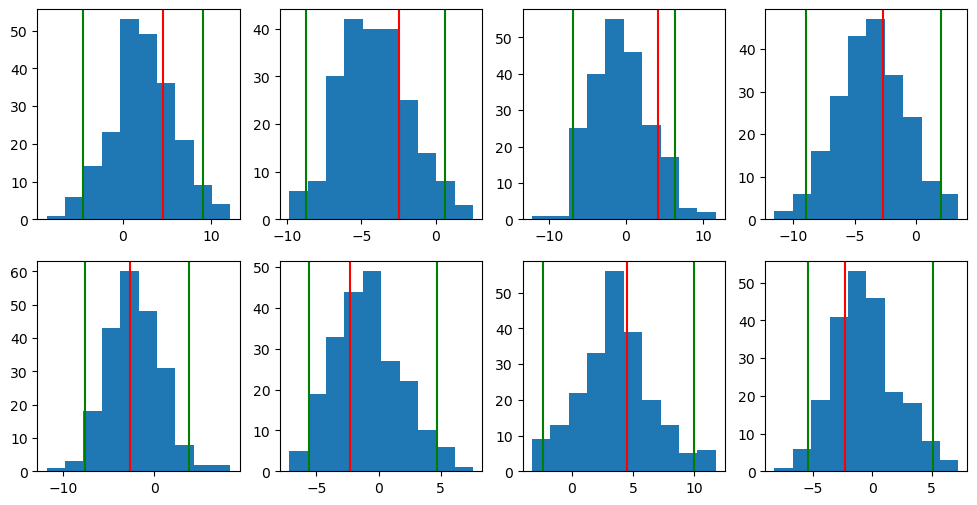

In [20]:
fig, axs = plt.subplots(2,4, figsize = (12,6))
axs = axs.ravel()

for i in range(0,8): 
    axs[i].hist(np.log(best_test_preds[:,i,:]/(1-best_test_preds[:,i,:])))
    ci = np.percentile(np.log(best_test_preds[:,i,:]/(1-best_test_preds[:,i,:])), q = (2.5, 97.5))
    l, u = ci[0], ci[1]
    axs[i].axvline(x=np.log(catch_test_probs[cur_idx][i]/(1-catch_test_probs[cur_idx][i])), color = "red")
    axs[i].axvline(x=l, color = "green")
    axs[i].axvline(x=u, color = "green")

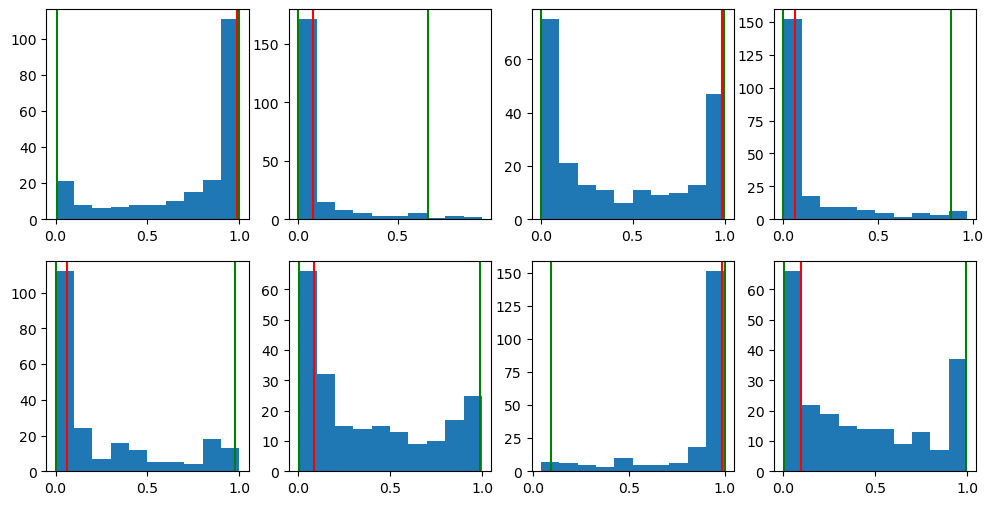

In [21]:
fig, axs = plt.subplots(2,4, figsize = (12,6))
axs = axs.ravel()

for i in range(0,8): 
    axs[i].hist(best_test_preds[:,i,:])
    ci = np.percentile(best_test_preds[:,i,:], q = (2.5, 97.5))
    l, u = ci[0], ci[1]
    axs[i].axvline(x=catch_test_probs[cur_idx][i], color = "red")
    axs[i].axvline(x=l, color = "green")
    axs[i].axvline(x=u, color = "green")

In [22]:
catch_preds = []
for i in range(0, catch_test_probs[cur_idx].shape[0]):
    enkf_preds = best_test_preds[:,i,:]
    enkf_preds_df = pd.DataFrame(enkf_preds)
    enkf_preds_df["Test_Sample_ID"] = i 
    enkf_preds_df.columns = ["EnKF_Preds", "Test_Sample_ID"]
    catch_preds.append(enkf_preds_df)

In [23]:
catch_preds_df = pd.concat(catch_preds)

In [24]:
ids = [i for i in range(0, catch_test_probs[cur_idx].shape[0]) if catch_test_probs[cur_idx][i] < 0.5]
ids_more = [i for i in range(0, catch_test_probs[cur_idx].shape[0]) if catch_test_probs[cur_idx][i] > 0.5]

In [25]:
ids_more = range(0,8)

In [26]:
catch_preds_df_filtered = catch_preds_df[catch_preds_df["Test_Sample_ID"].isin(ids_more)]

In [27]:
import seaborn as sns

In [28]:
filtered_true = catch_test_probs[cur_idx][ids_more,:]

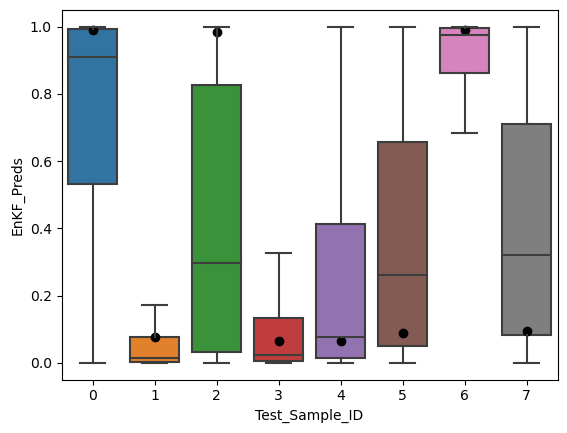

In [29]:
# plt.figure(figsize = (10,10))
fig = sns.boxplot(catch_preds_df_filtered, x="Test_Sample_ID", y="EnKF_Preds", showfliers=False)
plt.scatter(range(0, filtered_true.shape[0]), filtered_true, c = "black")
# plt.ylim((0.9,1.0))

In [30]:
catch_coverages = Parallel(n_jobs=15, verbose = 10, backend = "loky")(delayed(rep_one)(i) for i in range(reps))

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overf

thresh achieved
thresh achieved


[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:   29.5s


thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved


[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   32.2s


thresh achieved
thresh achieved


/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp


thresh achieved


/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarni

thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved


/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   57.4s


thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved


[Parallel(n_jobs=15)]: Done  27 out of  50 | elapsed:   58.7s remaining:   50.0s


thresh achieved


/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp


thresh achieved
thresh achieved


/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarni

thresh achieved


/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp


thresh achieved
thresh achieved


[Parallel(n_jobs=15)]: Done  33 out of  50 | elapsed:  1.4min remaining:   42.8s


thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved


[Parallel(n_jobs=15)]: Done  39 out of  50 | elapsed:  1.4min remaining:   23.9s


thresh achieved
thresh achieved
thresh achieved
thresh achieved


/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp


thresh achieved


/tmp/ipykernel_1874345/1617587586.py:348: RuntimeWarning: overflow encountered in exp
[Parallel(n_jobs=15)]: Done  45 out of  50 | elapsed:  1.5min remaining:    9.7s


thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved
thresh achieved


[Parallel(n_jobs=15)]: Done  50 out of  50 | elapsed:  1.8min finished


In [31]:
check = pd.DataFrame(catch_coverages).iloc[:,:-1]

In [32]:
check.columns = ["train_coverage", "test_coverage", "avg_ci_width_train", "avg_ci_width_test", "avg_word2vec_weight", "exit_iter", "exit_status", "time_taken"]

In [33]:
es = check[["exit_status"]].value_counts().reset_index()

In [34]:
es.columns = ["exit_status", "frequency"]

In [35]:
es.to_csv("exit_status_EnKF_Word2Vec_Doc2Vec_" + "var_weights_" + str(var_weights) + "_num_ens_" + str(size_ens) + ".csv", index = False)

In [36]:
check = check.drop(["exit_status"],1)

/tmp/ipykernel_1874345/3676205243.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  check = check.drop(["exit_status"],1)


In [37]:
check_mean = check.mean().reset_index()

In [38]:
check_mean.columns = ["metrics", "value"]

In [39]:
check_mean.to_csv("mean_metrics_EnKF_Word2Vec_Doc2Vec_" + "var_weights_" + str(var_weights) + "_num_ens_" + str(size_ens) +  ".csv", index = False)

In [40]:
check_median = check.median().reset_index()

In [41]:
check_median.columns = ["metrics", "value"]

In [42]:
check_median.to_csv("median_metrics_EnKF_Word2Vec_Doc2Vec_" + "var_weights_" + str(var_weights) + "_num_ens_" + str(size_ens)+  ".csv", index = False)

In [43]:
check_std = check.std().reset_index()

In [44]:
check_std.columns = ["metrics", "value"]

In [45]:
check_std.to_csv("std_dev_metrics_EnKF_Word2Vec_Doc2Vec_" + "var_weights_" + str(var_weights) + "_num_ens_" + str(size_ens)+  ".csv", index = False)